## Installing dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
for dirname, _, filenames in os.walk('/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df1 = pd.read_csv("Data/prevalence-by-mental-and-substance-use-disorder-AI.csv")
df2=pd.read_csv("Data/mental-and-substance-use-as-share-of-disease-AI.csv")

In [3]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [4]:
df2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986

In [5]:
#combining datasets
data = pd.merge(df1, df2)
data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                        

## Data Cleaning

In [6]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [8]:
data.drop('Code',axis=1,inplace=True)

In [9]:
data.head()

Entity  Year  \
0  Afghanistan  1990   
1  Afghanistan  1991   
2  Afghanistan  1992   
3  Afghanistan  1993   
4  Afghanistan  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189   

In [10]:
data.size,data.shape

(68400, (6840, 10))

In [11]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

In [12]:
data.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

### Exploratory Data Analysis

[]

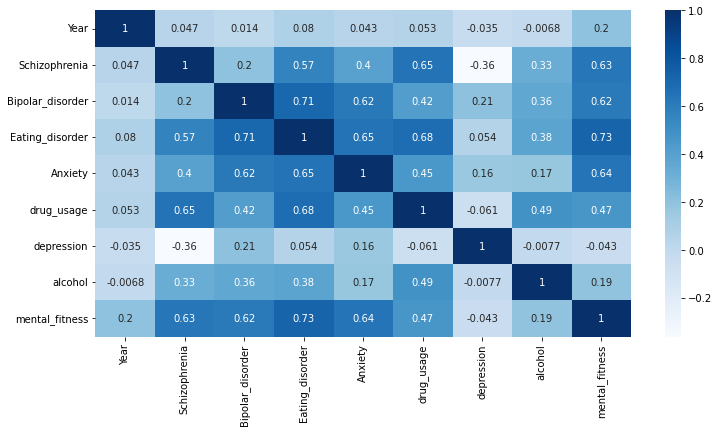

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

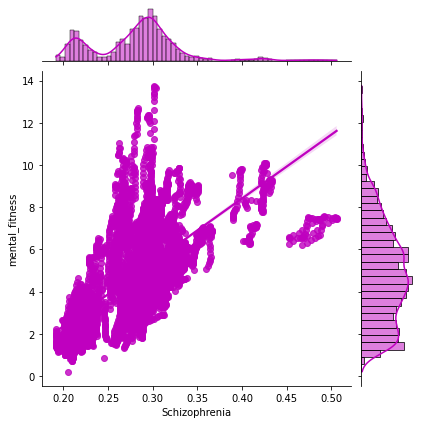

In [14]:
sns.jointplot(x='Schizophrenia',y='mental_fitness',data=data,kind='reg',color='m')
plt.show()

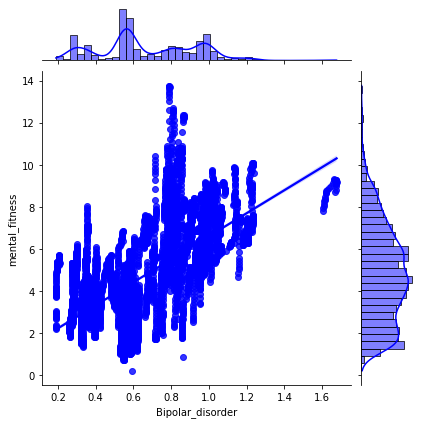

In [15]:
sns.jointplot(x='Bipolar_disorder',y='mental_fitness',data=data, kind='reg',color='blue')
plt.show()


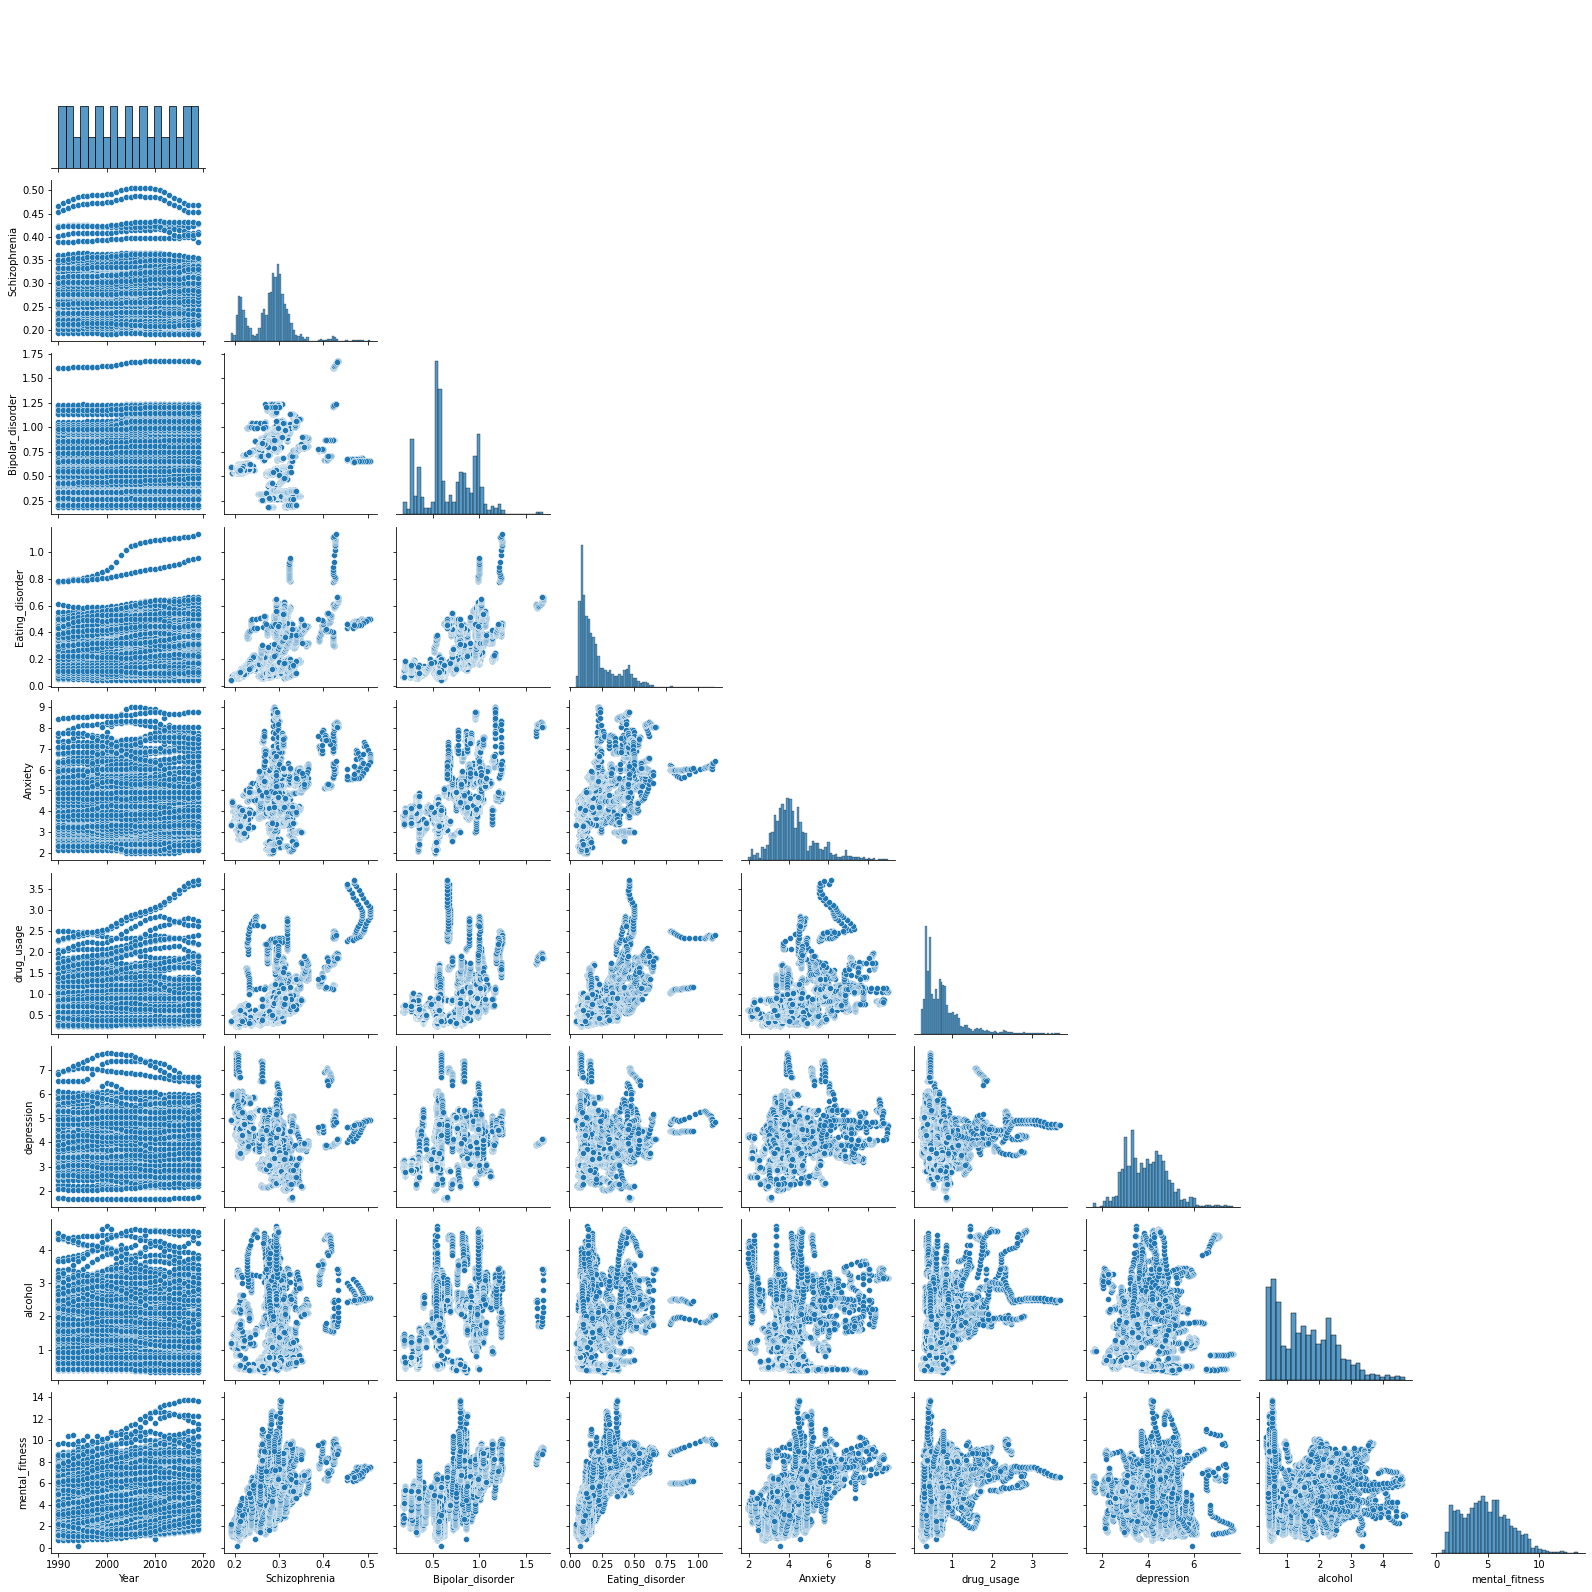

In [16]:
sns.pairplot(data,corner=True)
plt.show()

In [17]:
mean = data['mental_fitness'].mean()
mean

4.8180618117506135

In [18]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

In [19]:
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

## Yearwise variation in mental fitness pf different countires

In [20]:

fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [21]:
df = data.copy()

In [22]:
df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [24]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [25]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

## Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275


The model performance for testing set
--------------------------------------
MSE is 1.1357545319272409
RMSE is 1.0657178481789826
R2 score is 0.7638974087055268


## Random Forest Regressor

In [27]:

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.004966852865717851
RMSE is 0.07047590273077636
R2 score is 0.9990756544532318


The model performance for testing set
--------------------------------------
MSE is 0.029803093636770257
RMSE is 0.17263572526209706
R2 score is 0.9938044820087197


## Hyperparameter Tuning - Random Forest Regressor

In [41]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
}


In [45]:
s=StandardScaler()
xtest_scaled= s.fit_transform(xtest)

In [42]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_estimator_)


RandomForestRegressor(n_estimators=200)


In [43]:

# Best parameters and score
print("Best parameters found for Random Forest Regressor:")
print(grid_search.best_params_)
print("Best score found for Random Forest Regressor:")
print(grid_search.best_score_)

Best parameters found for Random Forest Regressor:
{'max_depth': None, 'n_estimators': 200}
Best score found for Random Forest Regressor:
0.9922647347981048


In [46]:
# Updated Random Forest Regressor
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(xtrain_scaled, ytrain)

# Model evaluation for training set
ytrain_pred = rf.predict(xtrain_scaled)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for the training set")
print("------------------------------------------")
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print()

# Model evaluation for testing set
ytest_pred = rf.predict(xtest_scaled)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

print("The model performance for the testing set")
print("-----------------------------------------")
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

The model performance for the training set
------------------------------------------
MSE: 0.00528298057701814
RMSE: 0.07268411502534884
R2 Score: 0.9990168221805532

The model performance for the testing set
-----------------------------------------
MSE: 0.18078118851960603
RMSE: 0.4251837114937566
R2 Score: 0.9624188978631273
